In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:

def erk2(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m],mass, G)
        w_2 = f(u[m] + tau*2/3*w_1, mass, G)
        u[m + 1] = u[m] + tau*(1/4*w_1 + 3/4*w_2)    
    return u

def erk3(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m],mass, G)
        w_2 = f(u[m] + tau*1/2*w_1, mass, G)
        w_3 = f(u[m] + tau*3/4*w_2, mass, G)
        u[m + 1] = u[m] + tau*(2/9*w_1 + 3/9*w_2 + 4/9*w_3)    
    return u

## Стандартная схема

In [3]:
def comet_modeling(u, mass, G):
    f = np.zeros(4)
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = -G*mass*u[0]/np.sqrt(u[0]**2 + u[1]**2)**3
    f[3] = -G*mass*u[1]/np.sqrt(u[0]**2 + u[1]**2)**3
    return f

In [4]:
t_0 = 0.; T = 75*365*24*60*60 # seconds

m1 = 1.989*10**30 # Sun
G = 6.67*10**(-11) 

M = 75*365
tau = (T - t_0) / M 
t = np.linspace(t_0, T, M + 1)

In [5]:
u = np.zeros((M + 1, 4))
u[0,0] = 5.2*10**9*1000# 
u[0,1] = 0. #  y
u[0,2] = 0. #  Vx
u[0,3] = 1000 # Vy

u = erk3(u, tau, M, m1, G, comet_modeling)

x = u[:, 0]
y = u[:, 1]

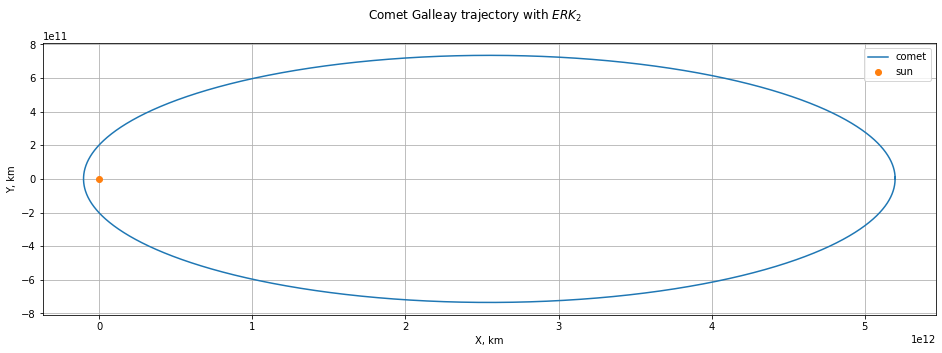

In [6]:
plt.figure(figsize=(16, 5))
plt.plot(x, y, label='comet')
plt.plot([0], [0], 'o', label='sun')
plt.xlabel('X, km'); plt.ylabel('Y, km')
plt.grid(1); plt.legend()
plt.suptitle(f'Comet Galleay trajectory with $ERK_{2}$')
plt.show()

## С использованием длинны дуги без адаптивного шага

In [7]:
def comet_modeling_line(u, mass, G,):
    f = np.zeros(4)
    zuz = np.sqrt(1 + u[2]**2 + u[3]**2 + (G*mass/(u[0]**2 + u[1]**2)**2)**2 )
    R3 = np.sqrt(u[0]**2 + u[1]**2)**3 
    f[0] = u[2] / zuz
    f[1] = u[3] / zuz
    f[2] = -G*mass*u[0]/(R3 * zuz)
    f[3] = -G*mass*u[1]/(R3 * zuz)
          
    return f

In [8]:
t_0 = 0.; T = 75*365*24*60*60 # seconds

m1 = 1.989*10**30 # Sun
G = 6.67*10**(-11) 

M = 240          
u = np.zeros((M + 1, 4))
u[0,0] = 5.2*10**9*1000 #  x
u[0,1] = 0. #  y
u[0,2] = 0. #  Vx
u[0,3] = 1000 # Vy

In [9]:
dl = 10**11/2
u = erk3(u, tau=dl, M=M, mass=m1, G=G, f=comet_modeling_line)

x = u[:, 0]
y = u[:, 1]

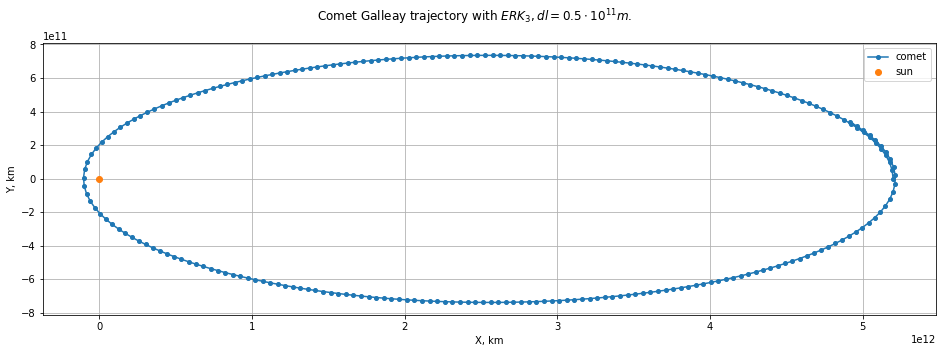

In [10]:
plt.figure(figsize=(16, 5))
plt.plot(x, y, '-o', label='comet', markersize=4)
plt.plot([0], [0], 'o', label='sun')
plt.xlabel('X, km'); plt.ylabel('Y, km')
plt.grid(1); plt.legend()
plt.suptitle('Comet Galleay trajectory with $ERK_{3}, dl = 0.5\cdot 10^{11} m$.')
plt.show()

## С использованием длинны дуги с адаптивным шагом

In [11]:
def erk3_adaptive(u, dl, T, mass, G, f):
    l = 0
    while u[l, 4] < T:
        w_1 = f(u[l],mass, G)
        w_2 = f(u[l] + dl*1/2*w_1, mass, G)
        w_3 = f(u[l] + dl*3/4*w_2, mass, G)
        u[l + 1] = u[l] + dl*(2/9*w_1 + 3/9*w_2 + 4/9*w_3) 
        l += 1
        
    return u, l

def comet_modeling_adaptive(u, mass, G,):
    f = np.zeros(5)
    zuz = np.sqrt(1 + u[2]**2 + u[3]**2 + (G*mass/(u[0]**2 + u[1]**2)**2)**2 )
    R3 = np.sqrt(u[0]**2 + u[1]**2)**3 
    f[0] = u[2] / zuz
    f[1] = u[3] / zuz
    f[2] = -G*mass*u[0]/(R3 * zuz)
    f[3] = -G*mass*u[1]/(R3 * zuz)
    f[4] = 1/zuz
          
    return f

In [12]:
t_0 = 0.; T = 75*365*24*60*60 # seconds

m1 = 1.989*10**30 # Sun
G = 6.67*10**(-11) 

      
u = np.zeros((100000, 5))
u[0,0] = 5.2*10**9*1000 #  x
u[0,1] = 0. #  y
u[0,2] = 0. #  Vx
u[0,3] = 1000 # Vy
u[0,4] = t_0 # t_0

In [13]:
dl = 10**9 # шаг раз в день
u, i = erk3_adaptive(u, dl, T, m1, G, comet_modeling_adaptive)

x = u[:i+1, 0]
y = u[:i+1, 1]

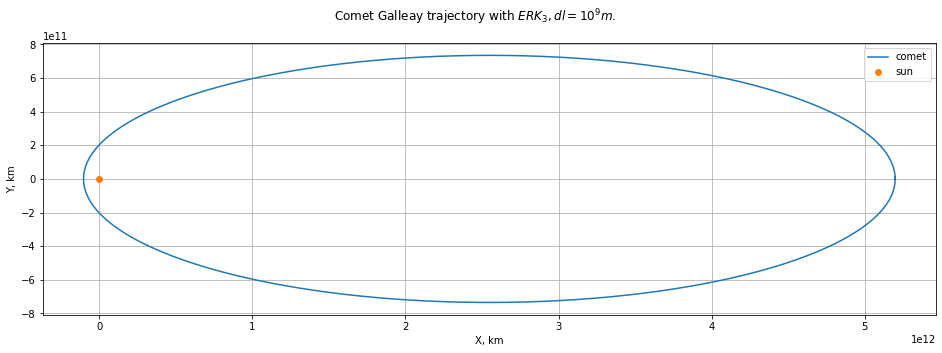

In [14]:
plt.figure(figsize=(16, 5))
plt.plot(x, y, label='comet', markersize=4)
plt.plot([0], [0], 'o', label='sun')
plt.xlabel('X, km'); plt.ylabel('Y, km')
plt.grid(1); plt.legend()
plt.suptitle('Comet Galleay trajectory with $ERK_{3}, dl = 10^{9} m$.')
plt.show()